## Importing the libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch

## Reading CSV data

In [15]:
data = pd.read_csv("Data_V3_EDA_Ready.csv")

In [16]:
data.shape

(1658, 18)

In [17]:
data.columns

Index(['Unnamed: 0', 'Name of Covered Entity', 'State', 'Covered Entity Type',
       'Breach Submission Date', 'Type of Breach',
       'Location of Breached Information', 'Business Associate Present',
       'Web Description', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'Individuals_Affected'],
      dtype='object')

In [18]:
# Removing the unwanted column
data.drop('Unnamed: 0', axis =1, inplace =True)

In [19]:
# Displaying the shape of dataset
data.shape

(1658, 17)

In [20]:
#fetching the columns of data
data.columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Breach Submission Date', 'Type of Breach',
       'Location of Breached Information', 'Business Associate Present',
       'Web Description', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'Individuals_Affected'],
      dtype='object')

In [21]:
data.isnull().any()

Name of Covered Entity              False
State                               False
Covered Entity Type                 False
Breach Submission Date              False
Type of Breach                      False
Location of Breached Information    False
Business Associate Present          False
Web Description                      True
2009                                False
2010                                False
2011                                False
2012                                False
2013                                False
2014                                False
2015                                False
2016                                False
Individuals_Affected                False
dtype: bool

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name of Covered Entity            1658 non-null   object 
 1   State                             1658 non-null   object 
 2   Covered Entity Type               1658 non-null   object 
 3   Breach Submission Date            1658 non-null   object 
 4   Type of Breach                    1658 non-null   object 
 5   Location of Breached Information  1658 non-null   object 
 6   Business Associate Present        1658 non-null   object 
 7   Web Description                   1271 non-null   object 
 8   2009                              1658 non-null   float64
 9   2010                              1658 non-null   float64
 10  2011                              1658 non-null   float64
 11  2012                              1658 non-null   float64
 12  2013  

In [23]:
data.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,Individuals_Affected
count,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1.658000e+03
mean,0.010856,0.118818,0.114596,0.123040,0.156212,0.170688,0.161037,0.144753,1.034313e+05
std,0.103658,0.323672,0.318630,0.328582,0.363166,0.376349,0.367676,0.351957,1.990474e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+02
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.345000e+03
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.796000e+03
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.880000e+07


## Fetching Information

### Univariate Exploration

### About Years Data

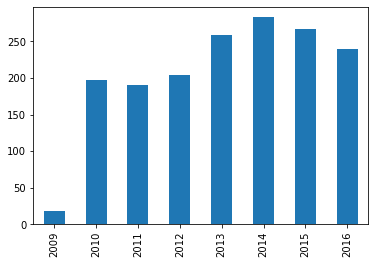

In [24]:
pd.DataFrame(data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum()).plot.bar(legend=False)

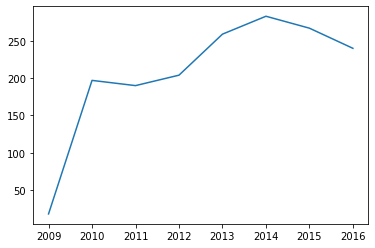

In [25]:
pd.DataFrame(data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum()).plot.line(legend=False)

In [26]:
type((data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum()) / data.shape[0])

pandas.core.series.Series

In [27]:
(data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum()) / data.shape[0]

2009    0.010856
2010    0.118818
2011    0.114596
2012    0.123040
2013    0.156212
2014    0.170688
2015    0.161037
2016    0.144753
dtype: float64

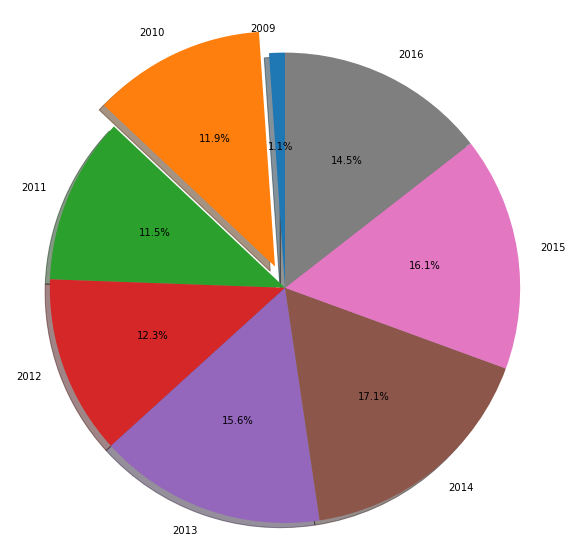

In [28]:
# Plotting the PIE CHART
# make figure and assign axis object

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
sizes = (data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum() / data.shape[0]).values
explode = (0, 0.1, 0, 0, 0, 0,0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10, 10))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### On 2009 Data

In [29]:
data_2009 = data[data['2009'] == 1]

In [30]:
data_2009.shape

(18, 17)

**WORKING ON DIFFERENT BREACH TYPES**

In [31]:
types_breach = []

for i in data['Type of Breach'].unique():
    breach_type = (str(i).split(','))
    types_breach.append(breach_type)
    
final_types = []
for i in types_breach:
    for j in i:
        final_types.append(j.strip())
        
final_types = set(final_types)
final_breach_types = final_types

breach_counts = dict.fromkeys(final_breach_types, 0) 

# Getting the count for each individual types of breach
for breach in data_2009['Type of Breach']:
    for breach_type in final_breach_types:
        if str(breach).find(breach_type) != -1:
            breach_counts[breach_type] += 1
            
breach_counts

{'Unauthorized Access/Disclosure': 0,
 'Other': 2,
 'Loss': 1,
 'Theft': 15,
 'Improper Disposal': 0,
 'Unknown': 0,
 'Hacking/IT Incident': 0}

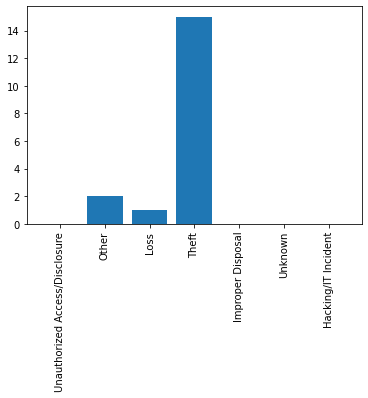

In [32]:
# PLotting the BAR CHART

plt.bar(range(len(breach_counts)), list(breach_counts.values()), align='center')
plt.xticks(range(len(breach_counts)), list(breach_counts.keys()), rotation='vertical')
plt.show()

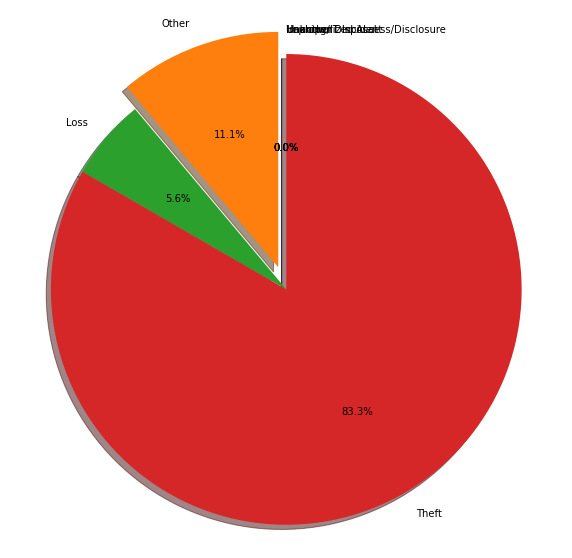

In [33]:
# Plotting a PIE _CHART
# make figure and assign axis object

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [*breach_counts]
sizes = np.array(list(breach_counts.values())) / np.sum(np.array(list(breach_counts.values())))
explode = (0, 0.1, 0, 0, 0, 0,0)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots(figsize=(10, 10))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**WORKING ON STATES DATA**

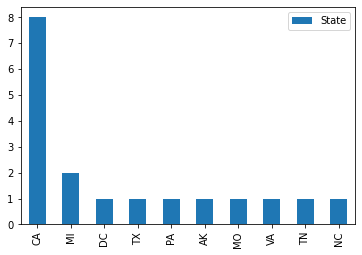

In [34]:
# Getting the States with top 10 Data Breaches
pd.DataFrame(data_2009['State'].value_counts()[:10]).plot.bar()

#### Working on 2010 - 2016 DATA

DISPLAYING DATA FOR 2010
(197, 17)
BREACH COUNTS !
{'Unauthorized Access/Disclosure': 8, 'Other': 23, 'Loss': 20, 'Theft': 136, 'Improper Disposal': 10, 'Unknown': 0, 'Hacking/IT Incident': 8}
BAR CHART FOR BREACH COUNTS !


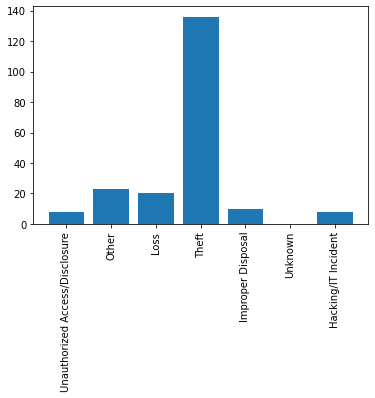

PIE CHART FOR BREACH COUNTS !


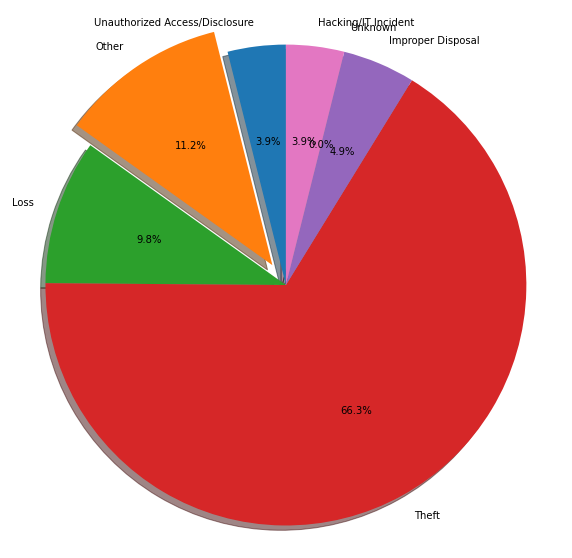

BAR CHART FOR STATE DATA !
AxesSubplot(0.125,0.125;0.775x0.755)


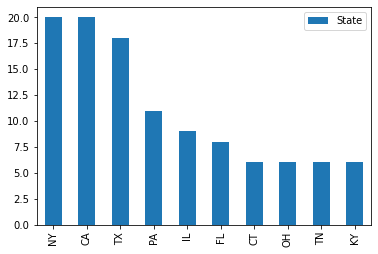

DISPLAYING DATA FOR 2011
(190, 17)
BREACH COUNTS !
{'Unauthorized Access/Disclosure': 32, 'Other': 2, 'Loss': 19, 'Theft': 120, 'Improper Disposal': 7, 'Unknown': 7, 'Hacking/IT Incident': 15}
BAR CHART FOR BREACH COUNTS !


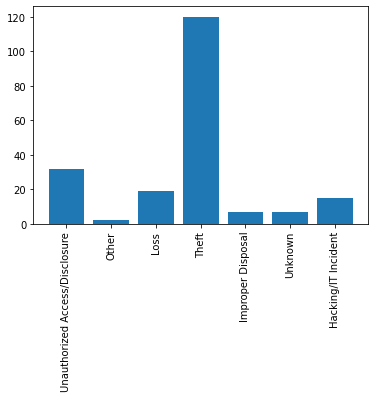

PIE CHART FOR BREACH COUNTS !


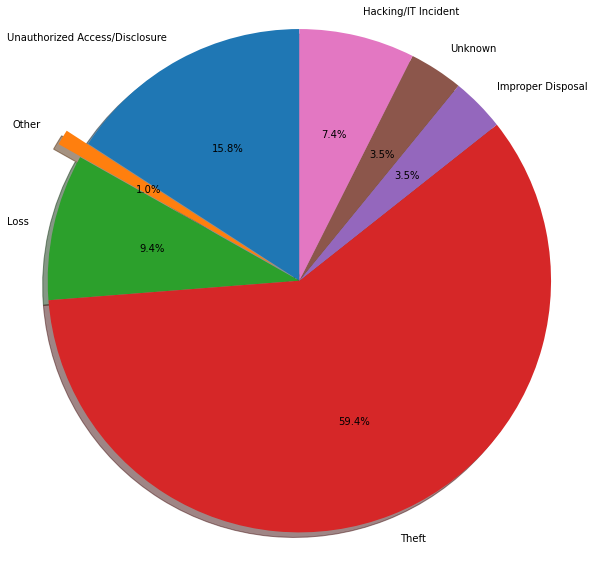

BAR CHART FOR STATE DATA !
AxesSubplot(0.125,0.125;0.775x0.755)


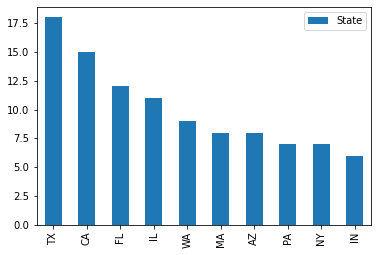

DISPLAYING DATA FOR 2012
(204, 17)
BREACH COUNTS !
{'Unauthorized Access/Disclosure': 38, 'Other': 21, 'Loss': 19, 'Theft': 123, 'Improper Disposal': 8, 'Unknown': 2, 'Hacking/IT Incident': 16}
BAR CHART FOR BREACH COUNTS !


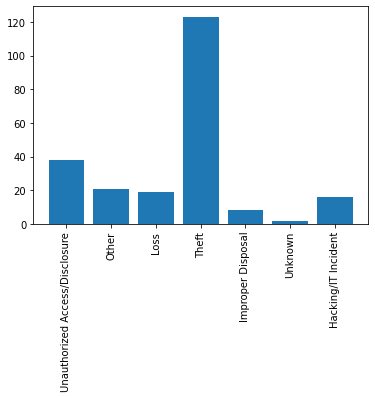

PIE CHART FOR BREACH COUNTS !


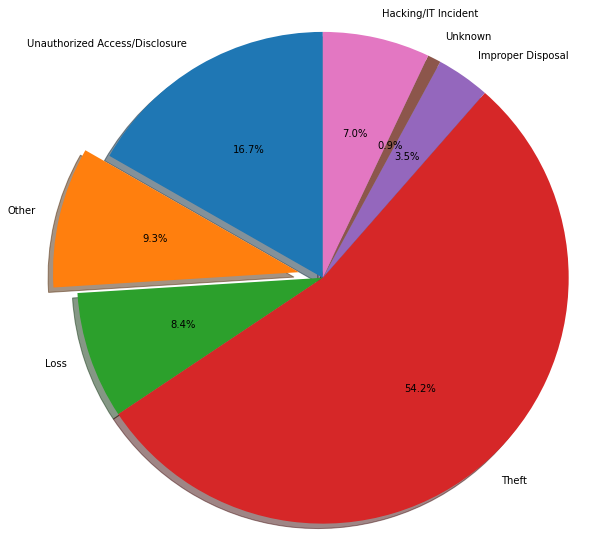

BAR CHART FOR STATE DATA !
AxesSubplot(0.125,0.125;0.775x0.755)


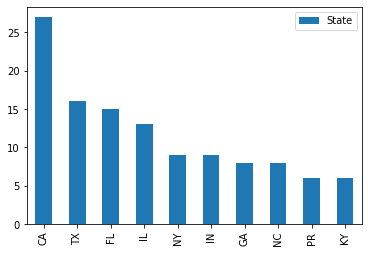

DISPLAYING DATA FOR 2013
(259, 17)
BREACH COUNTS !
{'Unauthorized Access/Disclosure': 67, 'Other': 19, 'Loss': 24, 'Theft': 131, 'Improper Disposal': 13, 'Unknown': 3, 'Hacking/IT Incident': 22}
BAR CHART FOR BREACH COUNTS !


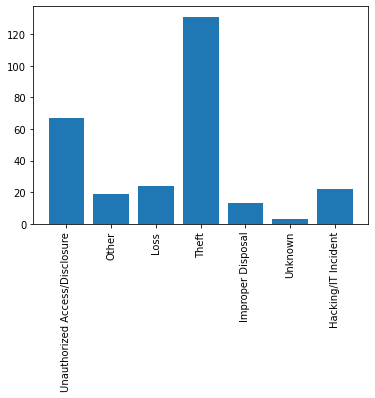

PIE CHART FOR BREACH COUNTS !


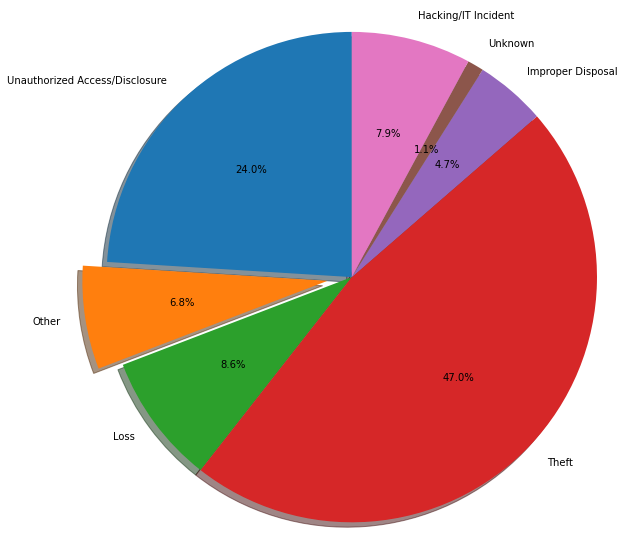

BAR CHART FOR STATE DATA !
AxesSubplot(0.125,0.125;0.775x0.755)


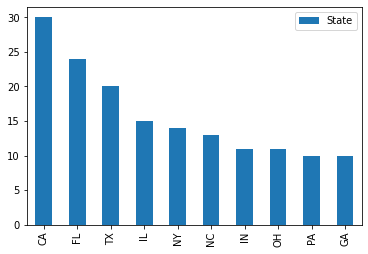

DISPLAYING DATA FOR 2014
(283, 17)
BREACH COUNTS !
{'Unauthorized Access/Disclosure': 88, 'Other': 30, 'Loss': 32, 'Theft': 119, 'Improper Disposal': 12, 'Unknown': 1, 'Hacking/IT Incident': 33}
BAR CHART FOR BREACH COUNTS !


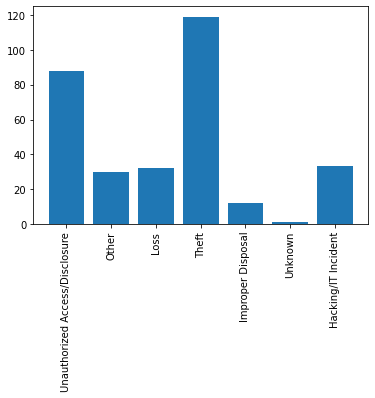

PIE CHART FOR BREACH COUNTS !


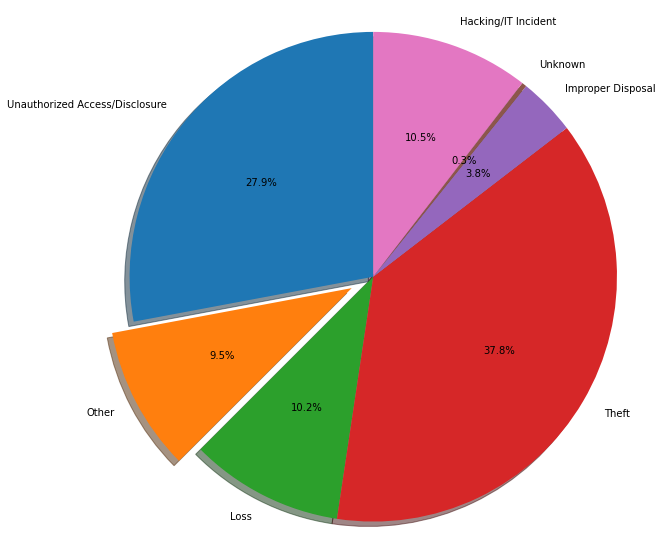

BAR CHART FOR STATE DATA !
AxesSubplot(0.125,0.125;0.775x0.755)


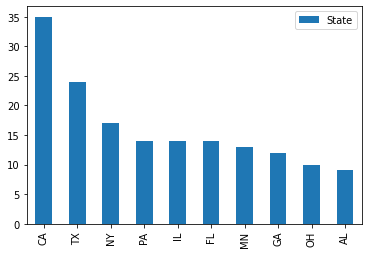

DISPLAYING DATA FOR 2015
(267, 17)
BREACH COUNTS !
{'Unauthorized Access/Disclosure': 101, 'Other': 0, 'Loss': 23, 'Theft': 80, 'Improper Disposal': 6, 'Unknown': 0, 'Hacking/IT Incident': 57}
BAR CHART FOR BREACH COUNTS !


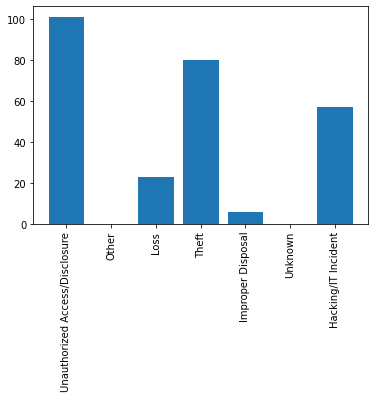

PIE CHART FOR BREACH COUNTS !


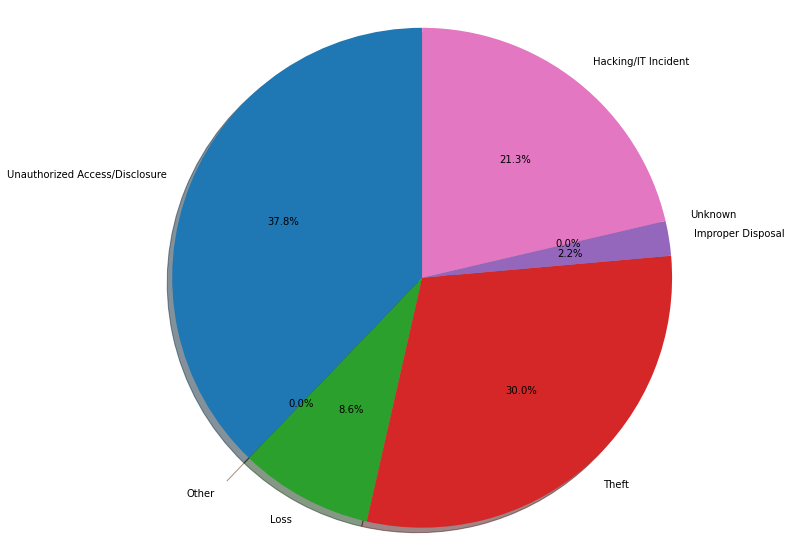

BAR CHART FOR STATE DATA !
AxesSubplot(0.125,0.125;0.775x0.755)


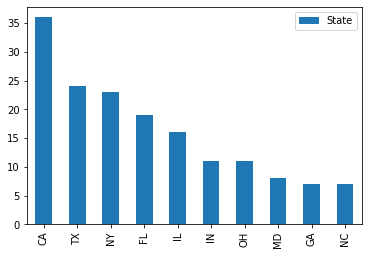

DISPLAYING DATA FOR 2016
(240, 17)
BREACH COUNTS !
{'Unauthorized Access/Disclosure': 101, 'Other': 0, 'Loss': 10, 'Theft': 45, 'Improper Disposal': 4, 'Unknown': 0, 'Hacking/IT Incident': 80}
BAR CHART FOR BREACH COUNTS !


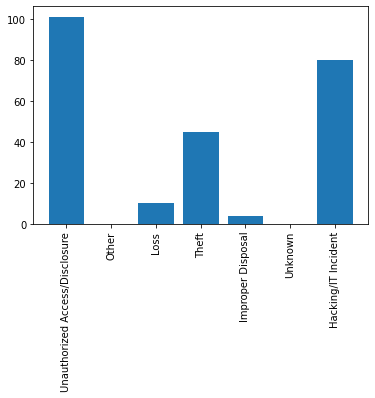

PIE CHART FOR BREACH COUNTS !


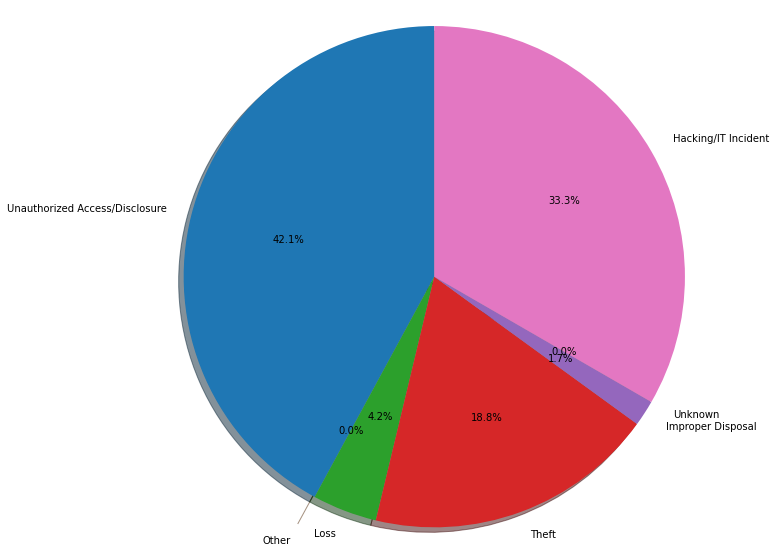

BAR CHART FOR STATE DATA !
AxesSubplot(0.125,0.125;0.775x0.755)


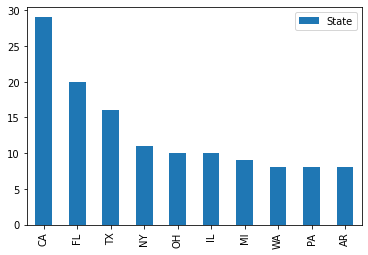

In [35]:
keys = ['2010', '2011', '2012', '2013', '2014', '2015', '2016']
for year in keys:
    print('\033[1m' + 'DISPLAYING DATA FOR '+ str(year) + '\033[0m')
    data_year = "data_" + str(year)
    data_year = data[data[year] == 1]
    print(data_year.shape)

    # Working on breach counts
    types_breach = []

    for i in data['Type of Breach'].unique():
        breach_type = (str(i).split(','))
        types_breach.append(breach_type)

    final_types = []
    for i in types_breach:
        for j in i:
            final_types.append(j.strip())

    final_types = set(final_types)
    final_breach_types = final_types

    breach_counts = dict.fromkeys(final_breach_types, 0) 

    # Getting the count for each individual types of breach
    for breach in data_year['Type of Breach']:
        for breach_type in final_breach_types:
            if str(breach).find(breach_type) != -1:
                breach_counts[breach_type] += 1
    print('\033[1m' + 'BREACH COUNTS !' + '\033[0m')
    print(breach_counts)

    # PLotting the BAR CHART
    print('\033[1m' + 'BAR CHART FOR BREACH COUNTS !' + '\033[0m')
    plt.bar(range(len(breach_counts)), list(breach_counts.values()), align='center')
    plt.xticks(range(len(breach_counts)), list(breach_counts.keys()), rotation='vertical')
    plt.show()

    # Plotting a PIE _CHART
    # make figure and assign axis object

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = [*breach_counts]
    sizes = np.array(list(breach_counts.values())) / np.sum(np.array(list(breach_counts.values())))
    explode = (0, 0.1, 0, 0, 0, 0,0)  # only "explode" the 2nd slice 

    fig1, ax1 = plt.subplots(figsize=(10, 10))

    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    print('\033[1m' + 'PIE CHART FOR BREACH COUNTS !' + '\033[0m')
    plt.show()

    # Plotting the STATES Data
    # Getting the States with top 10 Data Breaches
    print('\033[1m' + 'BAR CHART FOR STATE DATA !' + '\033[0m')
    ax = pd.DataFrame(data_year['State'].value_counts()[:10]).plot.bar()
    print(ax)
    plt.show()

**Vertically stacked bars for each state comparison for each YEAR : 1 PLOT**

**Horizontally & Vertically stacked for Each breach type for EACH YEAR: 2 PLOTS**

### Working on Individual Breach Types

In [36]:
# Fetching hte individual breach types
types_breach = []

for i in data['Type of Breach'].unique():
    breach_type = (str(i).split(','))
    types_breach.append(breach_type)
    
final_types = []
for i in types_breach:
    for j in i:
        final_types.append(j.strip())
        
final_types = set(final_types)
final_types

{'Hacking/IT Incident',
 'Improper Disposal',
 'Loss',
 'Other',
 'Theft',
 'Unauthorized Access/Disclosure',
 'Unknown'}

In [37]:
len(data['Type of Breach'].unique())

28

#### WORKING ON THEFT TYPE

In [38]:
# fetching all the composite unique types that contain "THEFT"
theft_list = []
for btype in data['Type of Breach'].unique():
    if btype.find("Theft") != -1:
        print(btype)
        theft_list.append(btype)

Hacking/IT Incident, Theft
Hacking/IT Incident, Theft, Unauthorized Access/Disclosure
Improper Disposal, Loss, Theft
Improper Disposal, Theft
Improper Disposal, Theft, Unauthorized Access/Disclosure
Loss, Other, Theft
Loss, Theft
Other, Theft
Other, Theft, Unauthorized Access/Disclosure
Theft
Theft, Unauthorized Access/Disclosure


In [39]:
# fetching all the rows that contain "Theft" in their breach type
theft_data = data[data['Type of Breach'].isin(theft_list)]
theft_data.shape

(769, 17)

In [40]:
# fetching top ten cities where breach type is THEFT
theft_data['State'].value_counts()[:10]

CA    115
TX     66
NY     52
FL     52
IL     35
PA     28
IN     24
WA     22
TN     22
OH     20
Name: State, dtype: int64

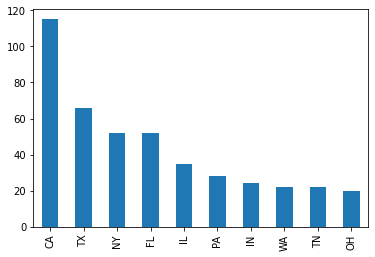

In [41]:
theft_data['State'].value_counts()[:10].plot.bar()

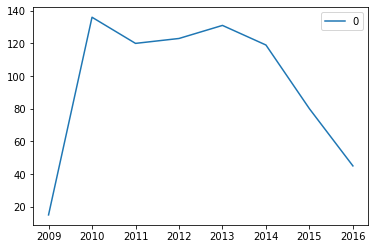

In [42]:
# fetching results for each YEAR
pd.DataFrame(theft_data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum()).plot.line()

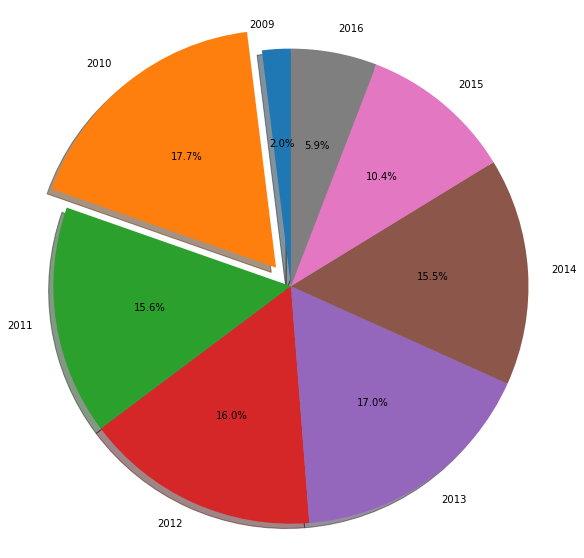

In [43]:
# Plotting distribution
# Plotting the PIE CHART

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
sizes = (theft_data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum() / theft_data.shape[0]).values
explode = (0, 0.1, 0, 0, 0, 0,0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10, 10))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [44]:
# Fetching Individuals affected per year
grp = theft_data.groupby(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])['Individuals_Affected'].sum()
grp = grp.reset_index()
grp

,2009,2010,2011,2012,2013,2014,2015,2016,Individuals_Affected
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,861954
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,747464
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7181447
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5990243
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2093779
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4746302
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3755546
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47363


In [45]:
type(grp)

pandas.core.frame.DataFrame

In [46]:
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [47]:
grp['YEAR'] = grp[labels].idxmax(1)
grp

,2009,2010,2011,2012,2013,2014,2015,2016,Individuals_Affected,YEAR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,861954,2016
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,747464,2015
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7181447,2014
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5990243,2013
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2093779,2012
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4746302,2011
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3755546,2010
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47363,2009


**MAKING SIMILAR CHANGE IN ORIGINAL DATASET**

In [48]:
data["YEAR"] = data[labels].idxmax(1)

In [49]:
data.to_csv("data_v4.csv")

In [50]:
tp = grp.groupby(["YEAR"])["Individuals_Affected"].sum()

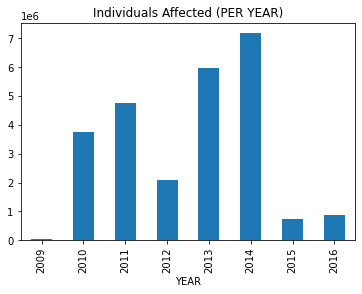

In [51]:
# Plotting the data
tp.plot.bar( title="Individuals Affected (PER YEAR)")

#### Working on Hacking/IT Incident

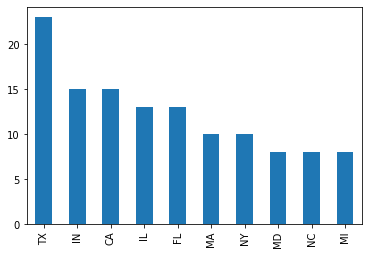

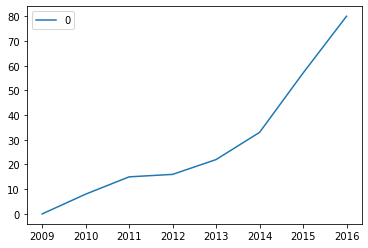

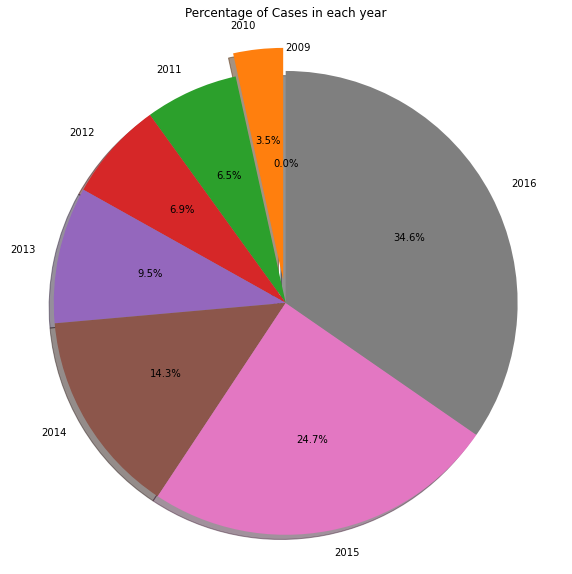

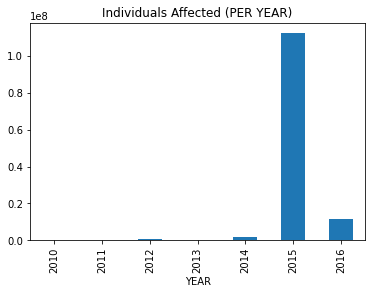

In [52]:
# fetching all the composite unique types that contain "THEFT"
hack_list = []
for btype in data['Type of Breach'].unique():
    if btype.find("Hacking/IT Incident") != -1:
        # print(btype)
        hack_list.append(btype)
        
# fetching all the rows that contain "Theft" in their breach type
hack_data = data[data['Type of Breach'].isin(hack_list)]
# fetching top ten cities where breach type is THEFT


hack_data['State'].value_counts()[:10].plot.bar()
plt.show()
# fetching results for each YEAR
pd.DataFrame(hack_data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum()).plot.line()
plt.show()
# Plotting distribution
# Plotting the PIE CHART

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
sizes = (hack_data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum() / hack_data.shape[0]).values
explode = (0, 0.1, 0, 0, 0, 0,0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10, 10))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Cases in each year")
plt.show()

# Fetching Individuals affected per year
grp = hack_data.groupby(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])['Individuals_Affected'].sum()
grp = grp.reset_index()
grp['YEAR'] = grp[labels].idxmax(1)
tp = grp.groupby(["YEAR"])["Individuals_Affected"].sum()
# Plotting the data
tp.plot.bar( title="Individuals Affected (PER YEAR)")

# Fetching Individuals affected per year
grp = hack_data.groupby(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])['Individuals_Affected'].sum()
grp = grp.reset_index()
grp['YEAR'] = grp[labels].idxmax(1)
tp = grp.groupby(["YEAR"])["Individuals_Affected"].sum()
# Plotting the data
tp.plot.bar( title="Individuals Affected (PER YEAR)")

#### Working on Loss breach type

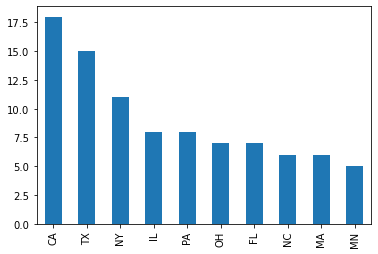

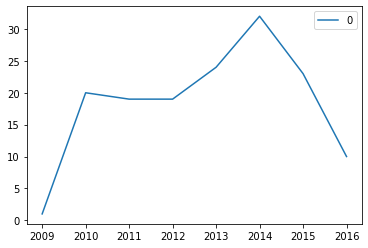

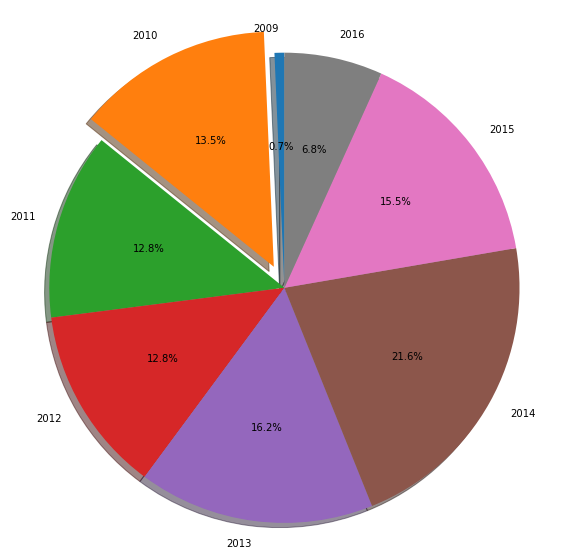

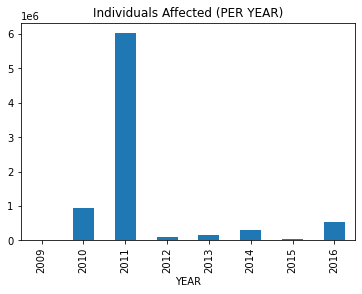

In [53]:
# fetching all the composite unique types that contain "THEFT"
loss_list = []
for btype in data['Type of Breach'].unique():
    if btype.find("Loss") != -1:
        # print(btype)
        loss_list.append(btype)
        
# fetching all the rows that contain "Theft" in their breach type
hack_data = data[data['Type of Breach'].isin(loss_list)]
# fetching top ten cities where breach type is THEFT

print()
hack_data['State'].value_counts()[:10].plot.bar()
plt.show()
# fetching results for each YEAR
pd.DataFrame(hack_data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum()).plot.line()
plt.show()
# Plotting distribution
# Plotting the PIE CHART

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
sizes = (hack_data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum() / hack_data.shape[0]).values
explode = (0, 0.1, 0, 0, 0, 0,0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10, 10))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Fetching Individuals affected per year
grp = hack_data.groupby(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])['Individuals_Affected'].sum()
grp = grp.reset_index()
grp['YEAR'] = grp[labels].idxmax(1)
tp = grp.groupby(["YEAR"])["Individuals_Affected"].sum()
# Plotting the data
tp.plot.bar( title="Individuals Affected (PER YEAR)")

#### Working on "Unauthorised access" breach type

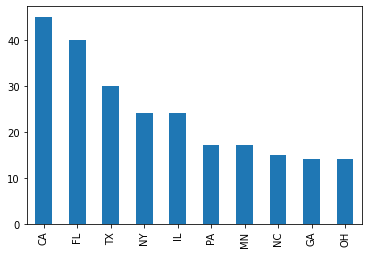

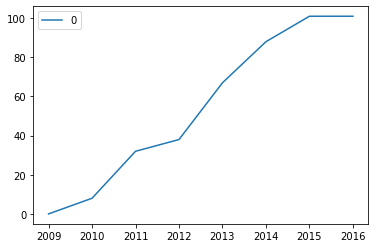

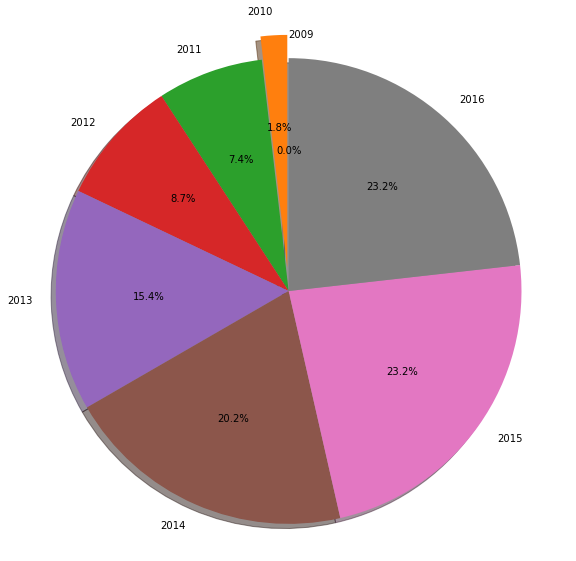

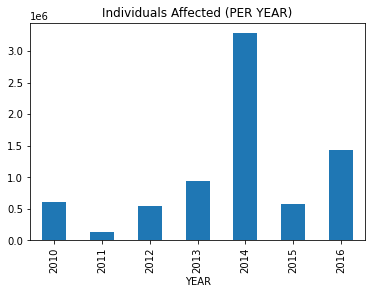

In [54]:
# fetching all the composite unique types that contain "THEFT"
unauth_list = []
for btype in data['Type of Breach'].unique():
    if btype.find("Unauthorized Access/Disclosure") != -1:
        # print(btype)
        unauth_list.append(btype)
        
# fetching all the rows that contain "Theft" in their breach type
hack_data = data[data['Type of Breach'].isin(unauth_list)]
# fetching top ten cities where breach type is THEFT

print()
hack_data['State'].value_counts()[:10].plot.bar()
plt.show()
# fetching results for each YEAR
pd.DataFrame(hack_data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum()).plot.line()
plt.show()
# Plotting distribution
# Plotting the PIE CHART

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
sizes = (hack_data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum() / hack_data.shape[0]).values
explode = (0, 0.1, 0, 0, 0, 0,0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10, 10))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Fetching Individuals affected per year
grp = hack_data.groupby(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])['Individuals_Affected'].sum()
grp = grp.reset_index()
grp['YEAR'] = grp[labels].idxmax(1)
tp = grp.groupby(["YEAR"])["Individuals_Affected"].sum()
# Plotting the data
tp.plot.bar( title="Individuals Affected (PER YEAR)")

#### Working on "UnKnown" breach type

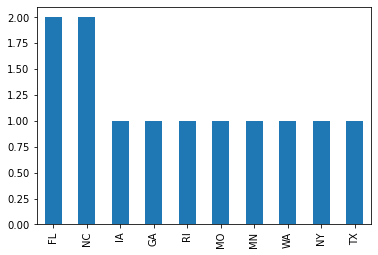

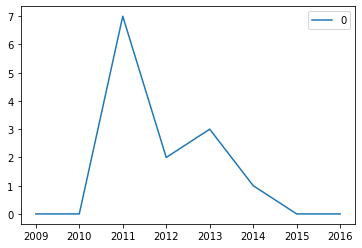

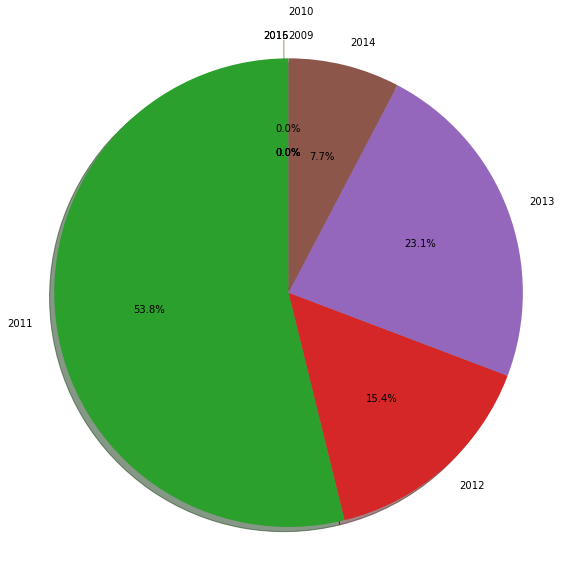

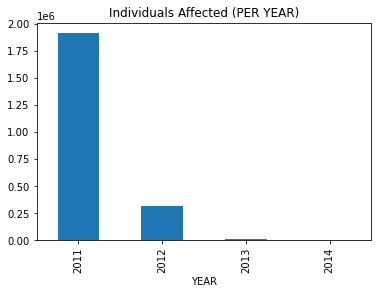

In [55]:
# fetching all the composite unique types that contain "THEFT"
unknown_list = []
for btype in data['Type of Breach'].unique():
    if btype.find("Unknown") != -1:
        # print(btype)
        unknown_list.append(btype)
        
# fetching all the rows that contain "Theft" in their breach type
hack_data = data[data['Type of Breach'].isin(unknown_list)]
# fetching top ten cities where breach type is THEFT

hack_data['State'].value_counts()[:10].plot.bar()
plt.show()
# fetching results for each YEAR
pd.DataFrame(hack_data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum()).plot.line()
plt.show()
# Plotting distribution
# Plotting the PIE CHART

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
sizes = (hack_data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum() / hack_data.shape[0]).values
explode = (0, 0.1, 0, 0, 0, 0,0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10, 10))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Fetching Individuals affected per year
grp = hack_data.groupby(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])['Individuals_Affected'].sum()
grp = grp.reset_index()
grp['YEAR'] = grp[labels].idxmax(1)
tp = grp.groupby(["YEAR"])["Individuals_Affected"].sum()
# Plotting the data
tp.plot.bar( title="Individuals Affected (PER YEAR)")

#### Working on "Other" categorical breach types

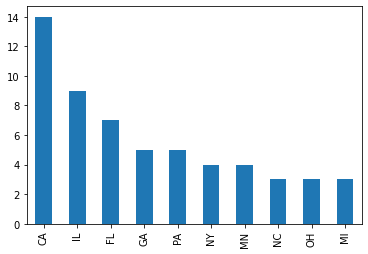

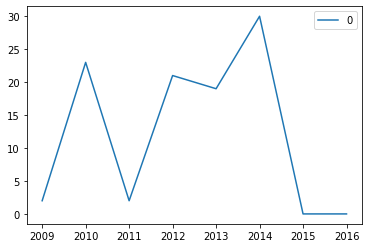

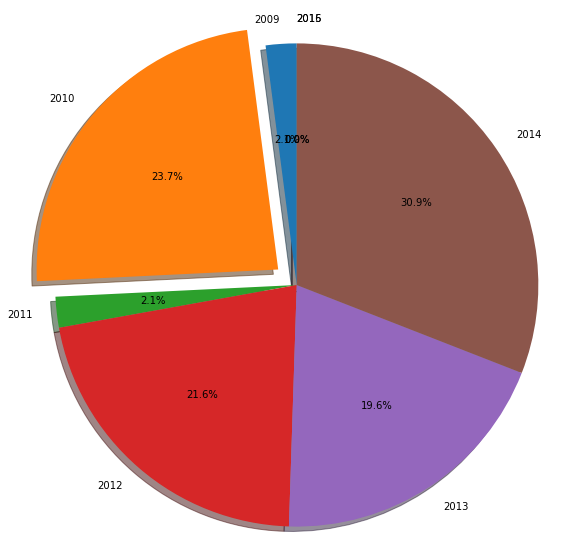

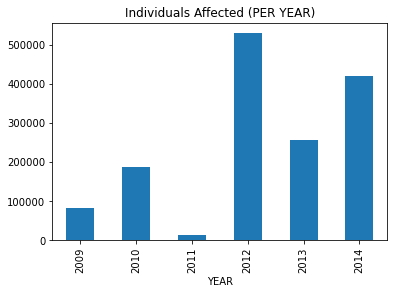

In [56]:
# fetching all the composite unique types that contain "THEFT"
other_list = []
for btype in data['Type of Breach'].unique():
    if btype.find("Other") != -1:
        # print(btype)
        other_list.append(btype)
        
# fetching all the rows that contain "Theft" in their breach type
hack_data = data[data['Type of Breach'].isin(other_list)]
# fetching top ten cities where breach type is THEFT

print()
hack_data['State'].value_counts()[:10].plot.bar()
plt.show()
# fetching results for each YEAR
pd.DataFrame(hack_data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum()).plot.line()
plt.show()
# Plotting distribution
# Plotting the PIE CHART

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
sizes = (hack_data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum() / hack_data.shape[0]).values
explode = (0, 0.1, 0, 0, 0, 0,0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10, 10))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Fetching Individuals affected per year
grp = hack_data.groupby(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])['Individuals_Affected'].sum()
grp = grp.reset_index()
grp['YEAR'] = grp[labels].idxmax(1)
tp = grp.groupby(["YEAR"])["Individuals_Affected"].sum()
# Plotting the data
tp.plot.bar( title="Individuals Affected (PER YEAR)")

#### Working on "Improper disposal" breach Type

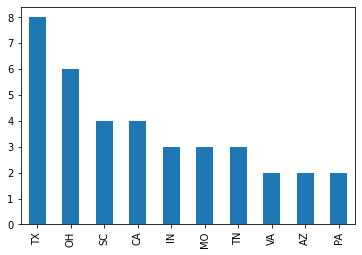

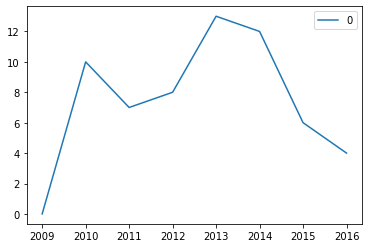

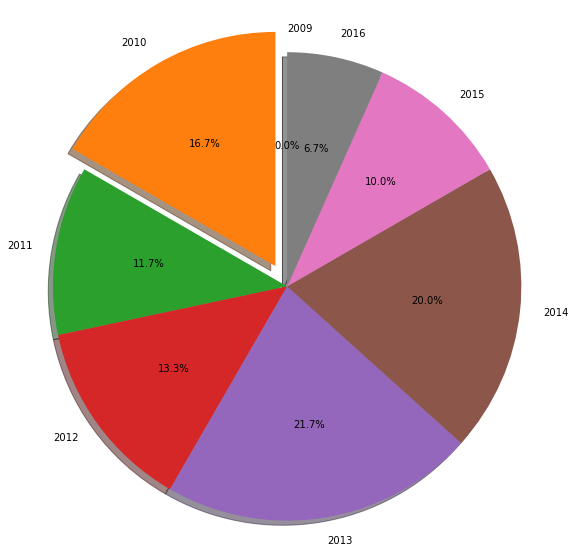

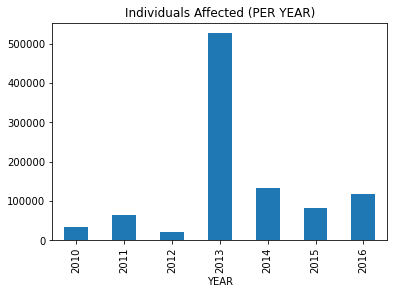

In [57]:
# fetching all the composite unique types that contain "THEFT"
improper_list = []
for btype in data['Type of Breach'].unique():
    if btype.find("Improper Disposal") != -1:
        # print(btype)
        improper_list.append(btype)
        
# fetching all the rows that contain "Theft" in their breach type
hack_data = data[data['Type of Breach'].isin(improper_list)]
# fetching top ten cities where breach type is THEFT

print()
hack_data['State'].value_counts()[:10].plot.bar()
plt.show()
# fetching results for each YEAR
pd.DataFrame(hack_data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum()).plot.line()
plt.show()
# Plotting distribution
# Plotting the PIE CHART

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
sizes = (hack_data[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].sum() / hack_data.shape[0]).values
explode = (0, 0.1, 0, 0, 0, 0,0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10, 10))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Fetching Individuals affected per year
grp = hack_data.groupby(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])['Individuals_Affected'].sum()
grp = grp.reset_index()
grp['YEAR'] = grp[labels].idxmax(1)
tp = grp.groupby(["YEAR"])["Individuals_Affected"].sum()
# Plotting the data
tp.plot.bar( title="Individuals Affected (PER YEAR)")

### Working on Individual States Data

In [58]:
# Fetching the 10 STATES withtop cases of data breaches
states = data['State'].value_counts()[:10]

In [59]:
states

CA    200
TX    137
FL    112
NY    101
IL     88
PA     60
OH     56
IN     55
GA     49
NC     44
Name: State, dtype: int64

In [60]:
# Fetching the STATES codes & storing them in the list
list(states.index)

['CA', 'TX', 'FL', 'NY', 'IL', 'PA', 'OH', 'IN', 'GA', 'NC']

In [61]:
states_names = list(states.index)

#### Working on "CA" (california) state

In [62]:
ca_data = data[data["State"]== 'CA']

In [63]:
ca_data

,Name of Covered Entity,State,Covered Entity Type,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,2009,2010,2011,2012,2013,2014,2015,2016,Individuals_Affected,YEAR
6,Mercy Medical Center Redding - Oncology Clinic...,CA,Healthcare Provider,2014-12-22,Hacking/IT Incident,Other,No,"On December 13, 2014, the covered entity (CE),...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,26416,2014
19,Apple Valley Care Center,CA,Healthcare Provider,2014-08-12,Hacking/IT Incident,Network Server,No,\N,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1251,2014
65,KP Northern CA Department of Research,CA,Healthcare Provider,2014-04-02,Hacking/IT Incident,Network Server,No,\N,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5178,2014
66,L.A. Gay & Lesbian Center,CA,Healthcare Provider,2013-12-10,Hacking/IT Incident,Network Server,No,\N,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,59000,2013
73,Marin Healthcare District,CA,Healthcare Provider,2016-09-27,Hacking/IT Incident,Network Server,No,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2292,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,"Genesis Physical Therapy, Inc.",CA,Healthcare Provider,2016-10-07,Unauthorized Access/Disclosure,Electronic Medical Record,No,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2245,2016
1604,Long Beach Memorial Medical Center,CA,Healthcare Provider,2013-07-11,Unauthorized Access/Disclosure,Electronic Medical Record,No,\N,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2864,2013
1610,Sierra View District Hospital,CA,Healthcare Provider,2013-09-20,Unauthorized Access/Disclosure,Electronic Medical Record,No,"A workforce member of the covered entity (CE),...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1009,2013
1617,University of California Irvine Medical Center,CA,Healthcare Provider,2015-06-17,Unauthorized Access/Disclosure,Electronic Medical Record,No,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4859,2015


**FETCHING THE BREACH TYPES WITH COUNTS FOR CA**

In [64]:
types_breach = []

for i in data['Type of Breach'].unique():
    breach_type = (str(i).split(','))
    types_breach.append(breach_type)
    
final_types = []
for i in types_breach:
    for j in i:
        final_types.append(j.strip())
        
final_types = set(final_types)
final_breach_types = final_types

breach_counts = dict.fromkeys(final_breach_types, 0) 

# Getting the count for each individual types of breach
for breach in ca_data['Type of Breach']:
    for breach_type in final_breach_types:
        if str(breach).find(breach_type) != -1:
            breach_counts[breach_type] += 1
            
breach_counts

{'Unauthorized Access/Disclosure': 45,
 'Other': 14,
 'Loss': 18,
 'Theft': 115,
 'Improper Disposal': 4,
 'Unknown': 0,
 'Hacking/IT Incident': 15}

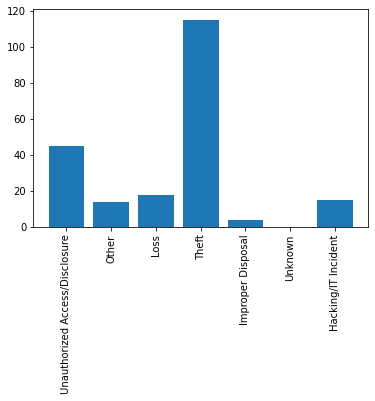

In [65]:
# PLotting the BAR CHART

plt.bar(range(len(breach_counts)), list(breach_counts.values()), align='center')
plt.xticks(range(len(breach_counts)), list(breach_counts.keys()), rotation='vertical')
plt.show()

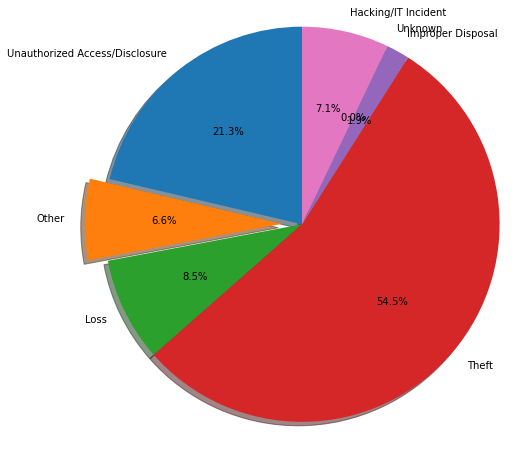

In [66]:
# PLOTTING THE PIE CHART
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [*breach_counts]
sizes = np.array(list(breach_counts.values())) / np.sum(np.array(list(breach_counts.values())))
explode = (0, 0.1, 0, 0, 0, 0,0)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots(figsize=(8,8))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**FETCHING THE INFORMATION FOR REMAINING STATES**

DISPLAYING DATA FOR CA STATE
DISPLAYING BAR CHART


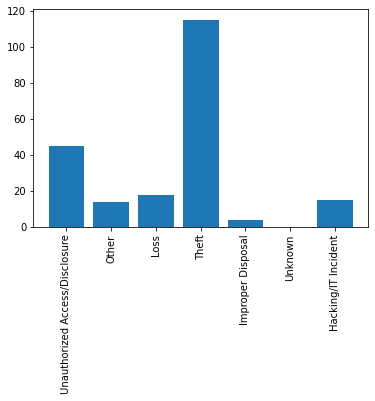

DISPLAYING PIE CHART


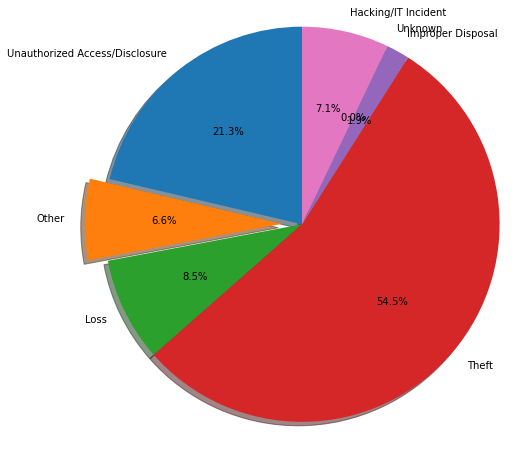

DISPLAYING DATA FOR TX STATE
DISPLAYING BAR CHART


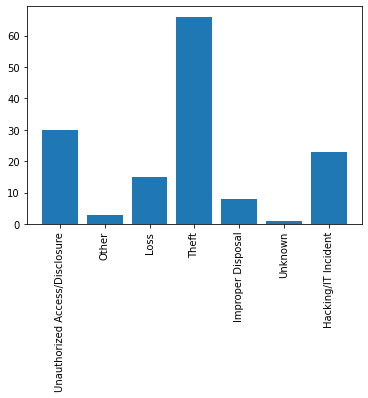

DISPLAYING PIE CHART


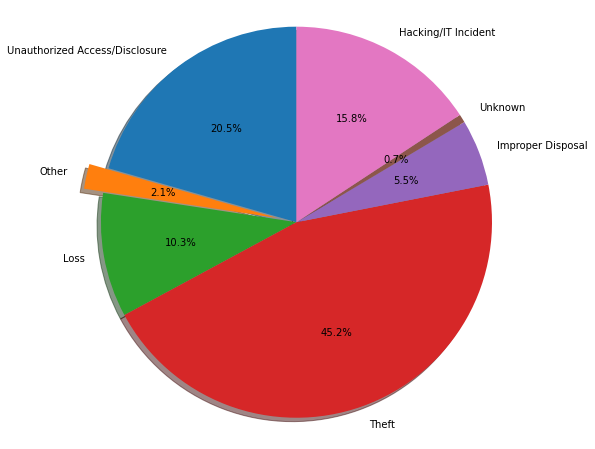

DISPLAYING DATA FOR FL STATE
DISPLAYING BAR CHART


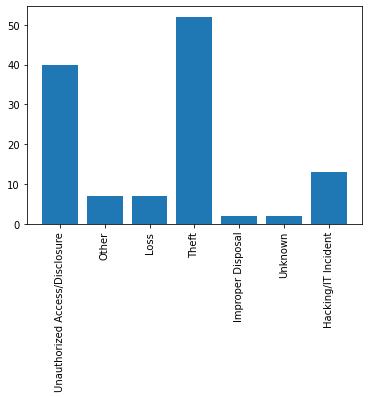

DISPLAYING PIE CHART


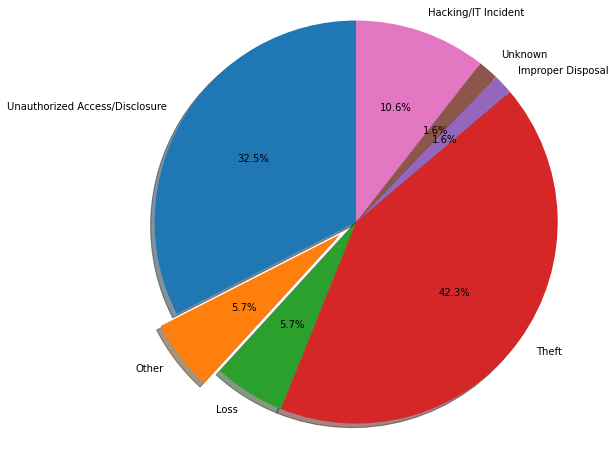

DISPLAYING DATA FOR NY STATE
DISPLAYING BAR CHART


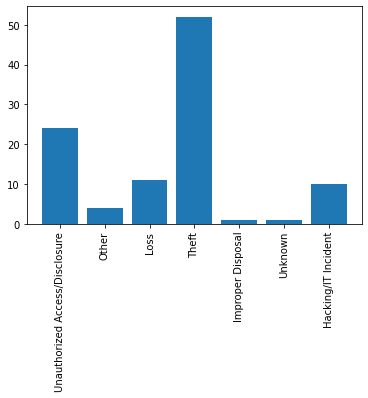

DISPLAYING PIE CHART


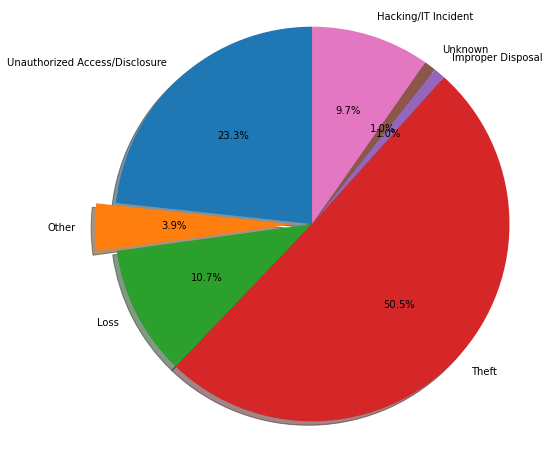

DISPLAYING DATA FOR IL STATE
DISPLAYING BAR CHART


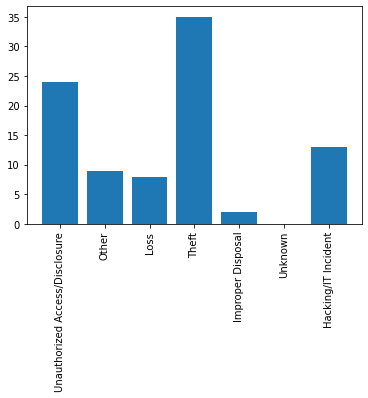

DISPLAYING PIE CHART


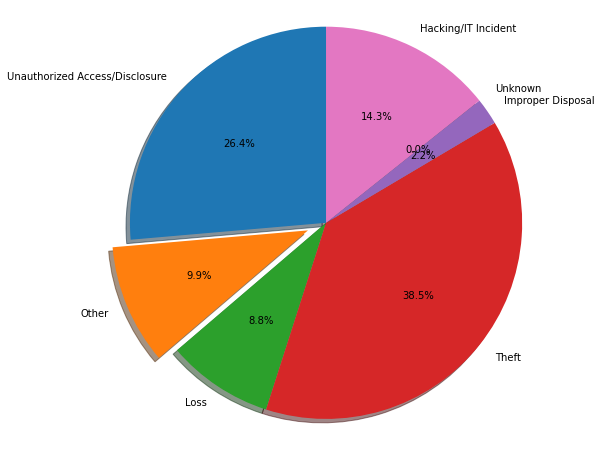

DISPLAYING DATA FOR PA STATE
DISPLAYING BAR CHART


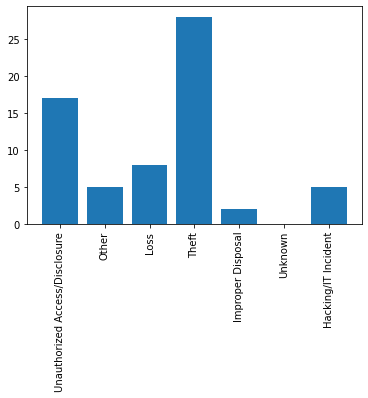

DISPLAYING PIE CHART


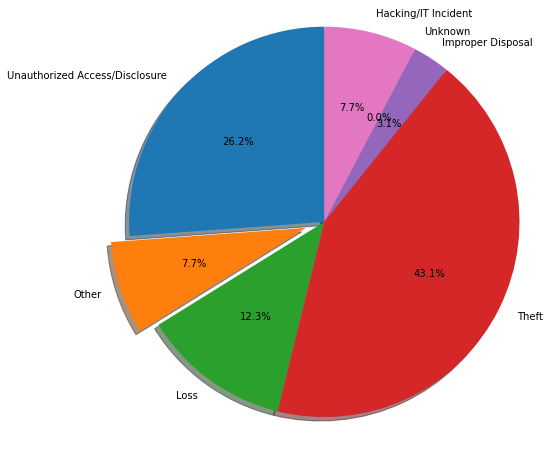

DISPLAYING DATA FOR OH STATE
DISPLAYING BAR CHART


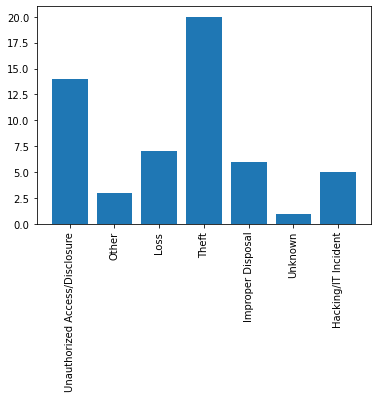

DISPLAYING PIE CHART


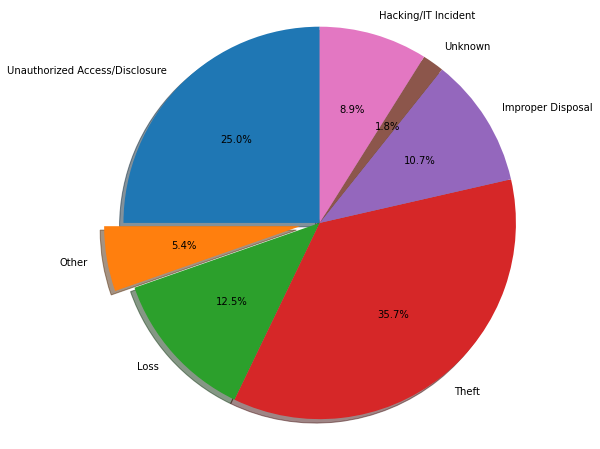

DISPLAYING DATA FOR IN STATE
DISPLAYING BAR CHART


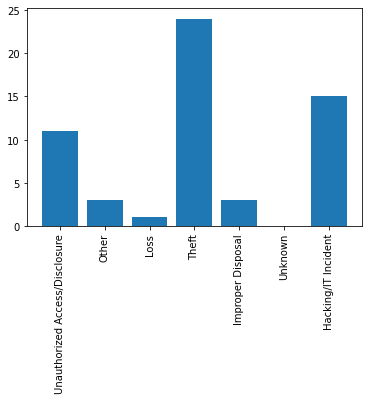

DISPLAYING PIE CHART


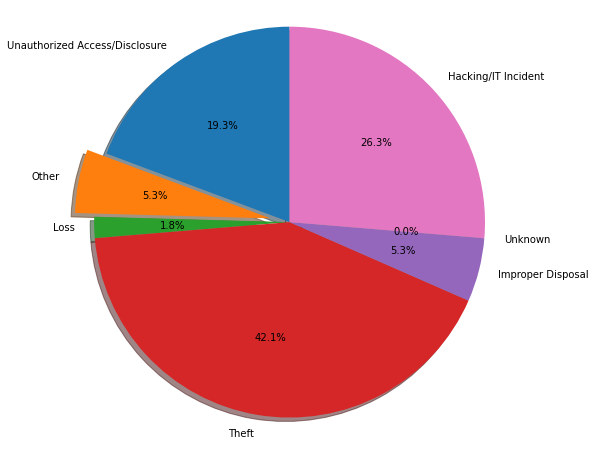

DISPLAYING DATA FOR GA STATE
DISPLAYING BAR CHART


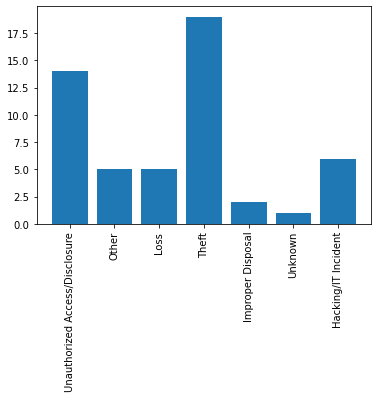

DISPLAYING PIE CHART


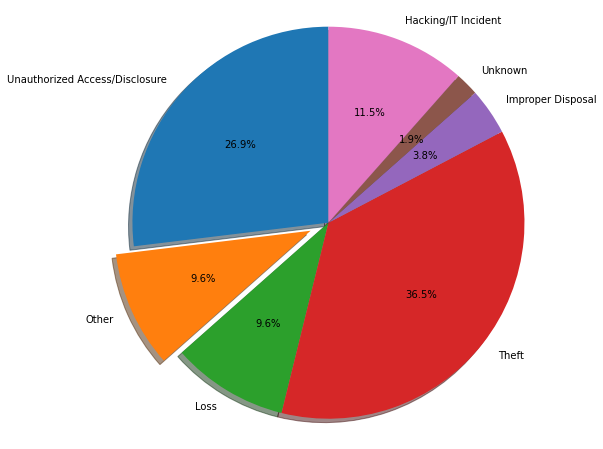

DISPLAYING DATA FOR NC STATE
DISPLAYING BAR CHART


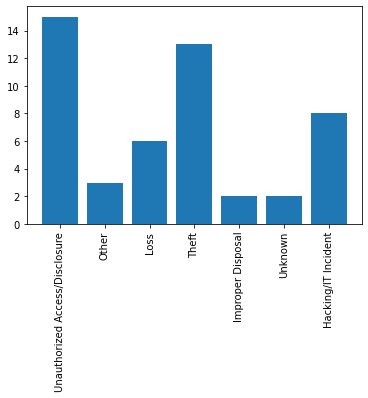

DISPLAYING PIE CHART


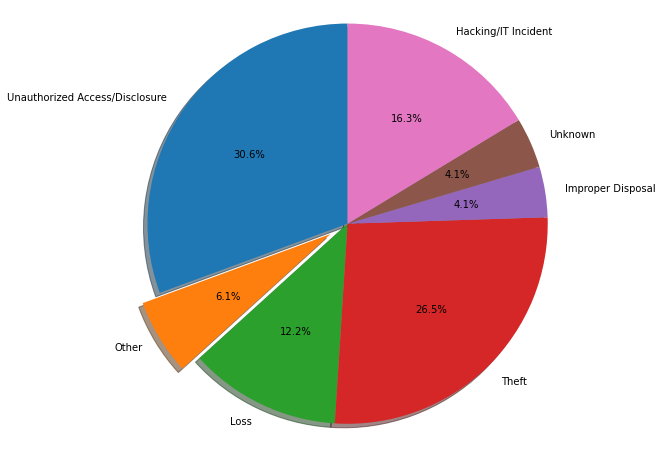

In [67]:
for st in states_names:
    print('\033[1m' + 'DISPLAYING DATA FOR '+ str(st) + " STATE" + '\033[0m')
    st_temp = data[data["State"]== st]
    types_breach = []

    for i in data['Type of Breach'].unique():
        breach_type = (str(i).split(','))
        types_breach.append(breach_type)

    final_types = []
    for i in types_breach:
        for j in i:
            final_types.append(j.strip())

    final_types = set(final_types)
    final_breach_types = final_types

    breach_counts = dict.fromkeys(final_breach_types, 0) 

    # Getting the count for each individual types of breach
    for breach in st_temp['Type of Breach']:
        for breach_type in final_breach_types:
            if str(breach).find(breach_type) != -1:
                breach_counts[breach_type] += 1
                
    # PLotting the BAR CHART
    print('\033[1m' + "DISPLAYING BAR CHART" + '\033[0m')
    plt.bar(range(len(breach_counts)), list(breach_counts.values()), align='center')
    plt.xticks(range(len(breach_counts)), list(breach_counts.keys()), rotation='vertical')
    plt.show()
    
    # PLOTTING THE PIE CHART
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    print('\033[1m' + "DISPLAYING PIE CHART" + '\033[0m')
    labels = [*breach_counts]
    sizes = np.array(list(breach_counts.values())) / np.sum(np.array(list(breach_counts.values())))
    explode = (0, 0.1, 0, 0, 0, 0,0)  # only "explode" the 2nd slice 

    fig1, ax1 = plt.subplots(figsize=(8,8))

    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

### On States Data From Overall Data (UNIVARIATE)

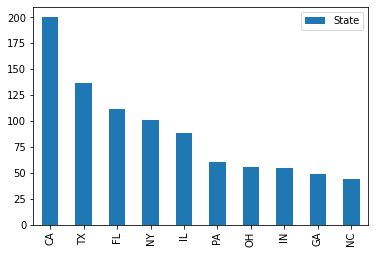

In [68]:
# Getting the States with top 10 Data Breaches
pd.DataFrame(data['State'].value_counts()[:10]).plot.bar()

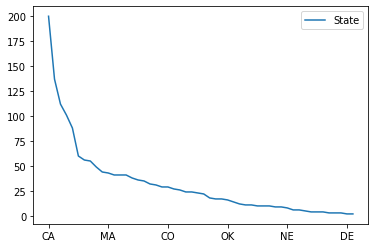

In [69]:
pd.DataFrame(data['State'].value_counts()).plot.line()

### On Breach Types

**FETCHING THE INDIVIDUAL BREACH TYPES**

In [70]:
types_breach = []

for i in data['Type of Breach'].unique():
    breach_type = (str(i).split(','))
    types_breach.append(breach_type)
    
final_types = []
for i in types_breach:
    for j in i:
        final_types.append(j.strip())
        
final_types = set(final_types)
final_breach_types = final_types

breach_counts = dict.fromkeys(final_breach_types, 0) 

# Getting the count for each individual types of breach
for breach in data['Type of Breach']:
    for breach_type in final_breach_types:
        if str(breach).find(breach_type) != -1:
            breach_counts[breach_type] += 1
            
breach_counts

{'Unauthorized Access/Disclosure': 435,
 'Other': 97,
 'Loss': 148,
 'Theft': 769,
 'Improper Disposal': 60,
 'Unknown': 13,
 'Hacking/IT Incident': 231}

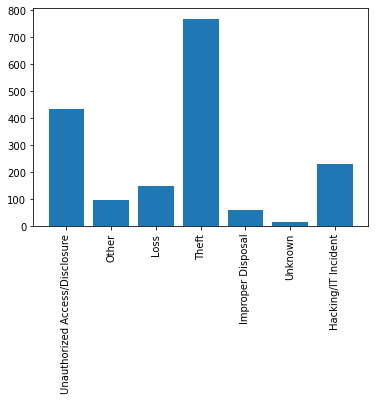

In [71]:
# PLotting the BAR CHART

plt.bar(range(len(breach_counts)), list(breach_counts.values()), align='center')
plt.xticks(range(len(breach_counts)), list(breach_counts.keys()), rotation='vertical')
plt.show()

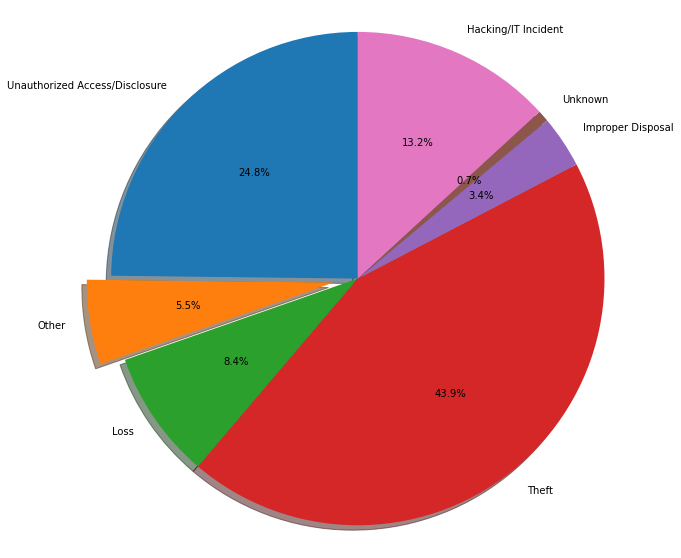

In [72]:
# Plotting a PIE _CHART
# make figure and assign axis object

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [*breach_counts]
sizes = np.array(list(breach_counts.values())) / np.sum(np.array(list(breach_counts.values())))
explode = (0, 0.1, 0, 0, 0, 0,0)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots(figsize=(10, 10))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Working on Affected Individuals Nuumber

In [73]:
# getting the upper limit of INDIVIDUALS AFFECTED
data['Individuals_Affected'].max()

78800000

In [74]:
# # getting the lower limit of INDIVIDUALS AFFECTED
data['Individuals_Affected'].min()

500

In [75]:
data['Individuals_Affected'].median()

2345.0

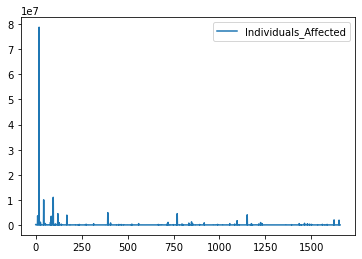

In [76]:
pd.DataFrame(data['Individuals_Affected']).plot.line()

{'whiskers': [<matplotlib.lines.Line2D at 0x1f331284a08>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3313afd88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3312843c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3313be2c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3313bebc8>],
 'means': []}

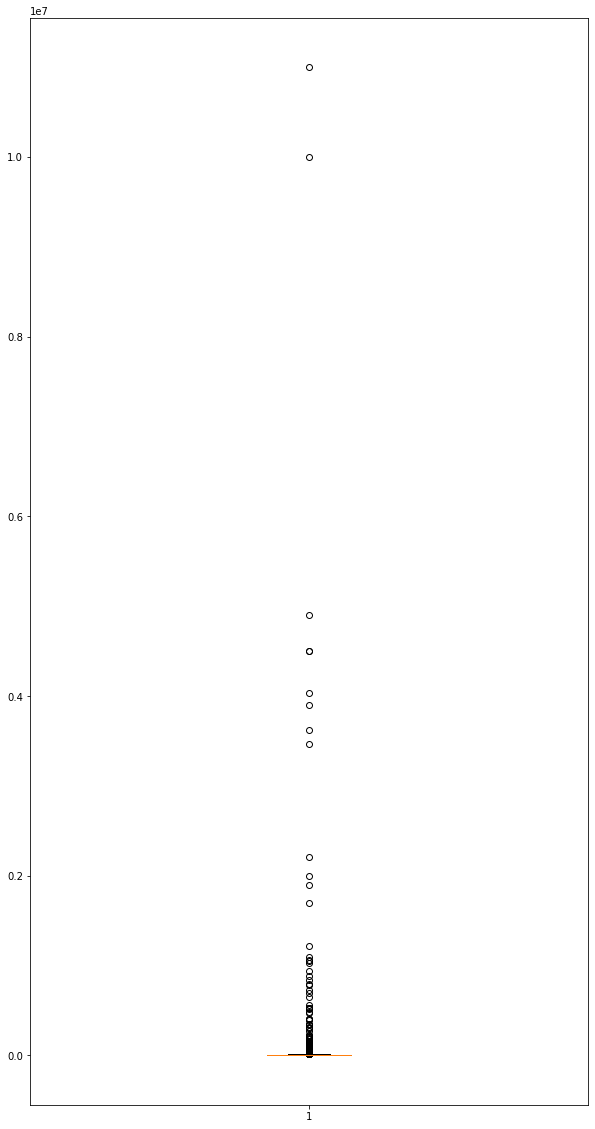

In [77]:
plt.figure( figsize = (10,20))
plt.boxplot(data['Individuals_Affected'][data['Individuals_Affected'] < data['Individuals_Affected'].max()])

### Working on Data Breach Locations

In [78]:
breach_loclist = []

for i in data['Location of Breached Information'].unique():
    breach_loca = (str(i).split(','))
    breach_loclist.append(breach_loca)
    
final_loca = []
for i in breach_loclist:
    for j in i:
        final_loca.append(j.strip())
        
final_loca = set(final_loca)
final_loca

{'Desktop Computer',
 'Electronic Medical Record',
 'Email',
 'Laptop',
 'Network Server',
 'Other',
 'Other Portable Electronic Device',
 'Paper/Films'}

In [79]:
breach_locdict = dict.fromkeys(final_loca, 0) 
# Getting the count for each individual types of breach
for loc in data['Location of Breached Information']:
    for breach_loca in final_loca:
        if str(breach_loca).find(loc) != -1:
            breach_locdict[breach_loca] += 1

In [80]:
breach_locdict

{'Other': 160,
 'Desktop Computer': 132,
 'Electronic Medical Record': 63,
 'Paper/Films': 383,
 'Network Server': 217,
 'Email': 126,
 'Other Portable Electronic Device': 253,
 'Laptop': 280}

#### Plotting the Data

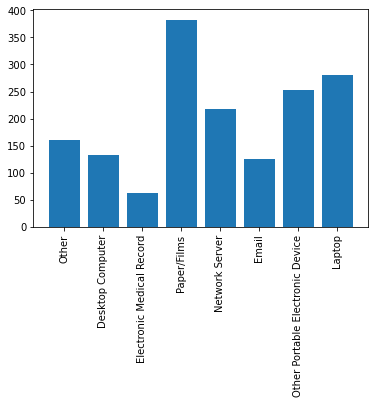

In [81]:
# PLotting the BAR CHART

plt.bar(range(len(final_loca)), list(breach_locdict.values()), align='center')
plt.xticks(range(len(final_loca)), list(breach_locdict.keys()), rotation='vertical')
plt.show()

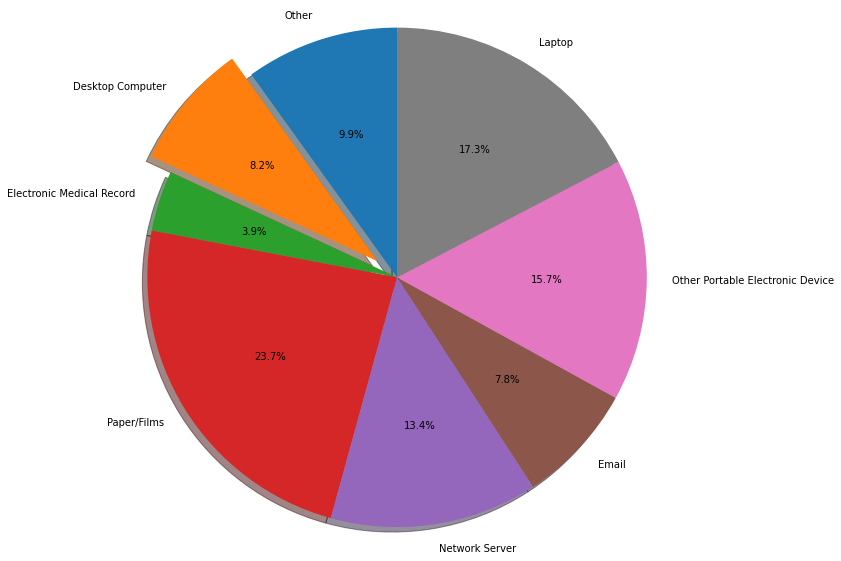

In [82]:
# Plotting a PIE _CHART
# make figure and assign axis object

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [*final_loca]
sizes = np.array(list(breach_locdict.values())) / np.sum(np.array(list(breach_locdict.values())))
explode = (0, 0.1, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots(figsize=(10, 10))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**OTHER POSSIBLE ANALYSIS REMAINING :**
* analysis of each Individual breach location simialar to one I did for different breach types.